## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## Load and Explore the Dataset


In [4]:
wine = pd.read_csv("wine.csv")

In [5]:
#Check the first few rows to understand the structure:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#Check for missing values:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Convert Wine Quality into a Binary Classification

In [9]:
#Since we are using 0.6 as the benchmark, let’s classify wines:
wine['quality'] = wine['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [10]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
#check for the class distriution
wine['quality'].value_counts() 

quality
1    855
0    744
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

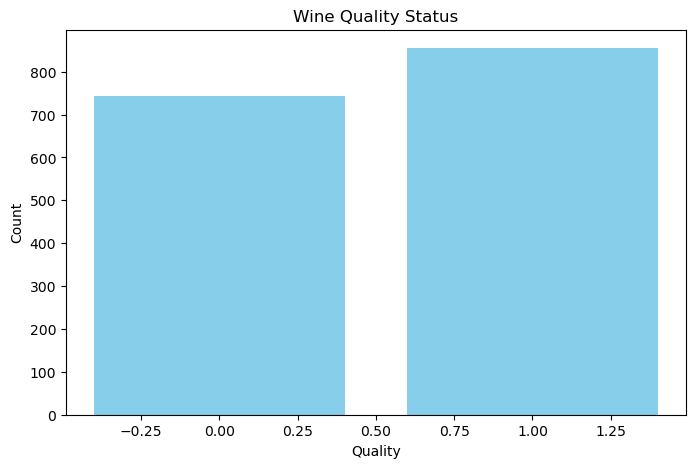

In [13]:
# Count wine quality occurrences
wine_counts = wine["quality"].value_counts().reset_index()
wine_counts.columns = ["quality", "count"]
wine_counts = wine_counts.sort_values(by="quality")  # Ensure sorted order

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(wine_counts["quality"], wine_counts["count"], color="skyblue")

# Labels and title
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Wine Quality Status")

# Show the plot
plt.show()

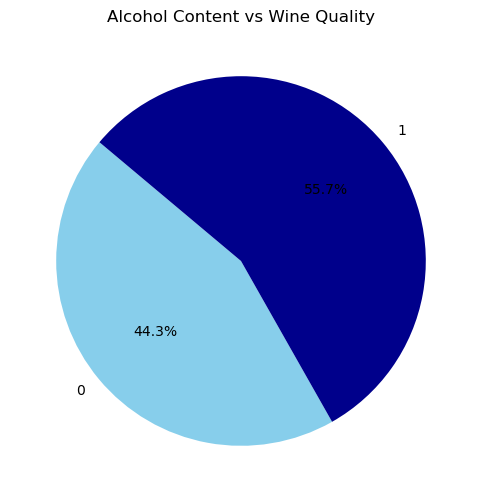

In [14]:
# Aggregate alcohol content by wine quality
wine_alcohol = wine.groupby("quality")["alcohol"].sum().reset_index()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(wine_alcohol["alcohol"], labels=wine_alcohol["quality"], autopct="%1.1f%%", colors=["skyblue", "darkblue"], startangle=140)

# Title
plt.title("Alcohol Content vs Wine Quality")

# Show the plot
plt.show()

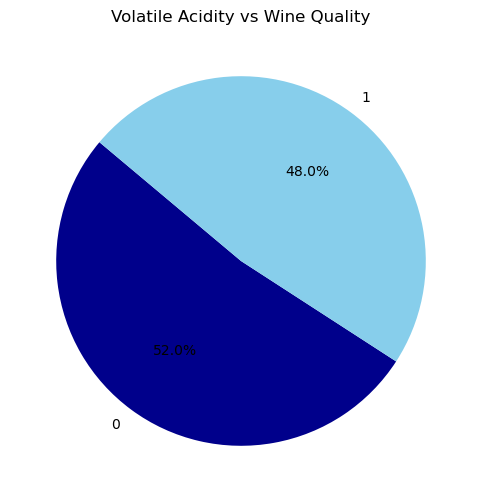

In [15]:
# Aggregate volatile acidity by wine quality
wine_acidity = wine.groupby("quality")["volatile_acidity"].sum()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(wine_acidity, labels=wine_acidity.index, autopct="%1.1f%%", colors=['darkblue', 'skyblue'], startangle=140)

# Title
plt.title("Volatile Acidity vs Wine Quality")

# Display the plot in Streamlit
plt.show()

## TRAIN TEST SPLIT¶

In [17]:
x = wine.drop(columns=["quality"])
y = wine["quality"]

In [18]:
#80% for training data and 20% for test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [19]:
#cHECKING THE SHAPE OF OUR DATA
wine.shape, x_train.shape, x_test.shape

((1599, 12), (1279, 11), (320, 11))

## MODEL TRAINING

## LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
#x_train model accuracy
#X_train accuracy

x_train_predict =model.predict(x_train)
x_train_accuracy = accuracy_score(x_train_predict, y_train)
print(x_train_accuracy)




0.7560594214229867


In [26]:
y_pred = model.predict(x_test)

In [27]:
#x_test model accuracy
#X_test accuracy

x_test_predict =model.predict(x_test)
x_test_accuracy = accuracy_score(x_test_predict, y_test)
print(x_test_accuracy)

0.734375


## Support Vector Machine¶

In [29]:
from sklearn import svm

In [30]:
from sklearn.svm import SVC

In [31]:
classifier = svm.SVC(kernel = 'linear')

In [32]:
#fitting our training data into the classifier
# x_training data and y_train is the label
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [33]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [34]:
#accuracy score of the train data
print('Accuracy score of the Training Data is :', training_data_accuracy) 

Accuracy score of the Training Data is : 0.7458952306489445


In [35]:
#evaluting the model to know the accuracy the test data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [36]:
print('Accuracy score of the Test Data is :', test_data_accuracy)

Accuracy score of the Test Data is : 0.721875


## Random Forest Classifier

In [38]:
# importing random forest classfier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Creating a RF CALSSIFIER
clf = RandomForestClassifier(n_estimators = 100)

In [40]:
# Training the module on the traiing dataset
# fit function is used to train the model using the training set as parameters
clf.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
x_train_prediction = clf.predict(x_train)

training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [42]:
print ('Accuracy score of the Tranining Data is :', training_data_accuracy)

Accuracy score of the Tranining Data is : 1.0


In [43]:
x_test_prediction = clf.predict(x_test)

test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [44]:
print ('Accuracy score of the Test Data is :', 
       test_data_accuracy)

Accuracy score of the Test Data is : 0.79375


## Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.svm import SVC

In [49]:
models = [LogisticRegression(max_iter = 10000), RandomForestClassifier(), SVC(kernel='linear')]

In [50]:
## writing function to compare the models

def cv_models(x, y):
    #writing a for loop for the models
    for model in models:
        cv_score = cross_val_score(model, x, y, cv =5)

        #calculate mean accuracy
        mean_accuracy = sum(cv_score)/len(cv_score) #calculate mean accuracy
        mean_accuracy = mean_accuracy*100 # convert to percentage
        mean_accuracy = round(mean_accuracy, 2) # round to 2 decimal places
        print('Cross validation accuracies for the', model, '=', cv_score)
        print('Accuracy % of the ', model, mean_accuracy)
        print('.............................')

'''cv = cross validation'''

'cv = cross validation'

In [51]:
cv_models(x, y)

Cross validation accuracies for the LogisticRegression(max_iter=10000) = [0.69375   0.7       0.771875  0.74375   0.7492163]
Accuracy % of the  LogisticRegression(max_iter=10000) 73.17
.............................
Cross validation accuracies for the RandomForestClassifier() = [0.68125    0.725      0.771875   0.721875   0.70532915]
Accuracy % of the  RandomForestClassifier() 72.11
.............................
Cross validation accuracies for the SVC(kernel='linear') = [0.690625   0.684375   0.78125    0.7625     0.74294671]
Accuracy % of the  SVC(kernel='linear') 73.23
.............................


In [52]:
#Making a predictive system
input_data = (1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2)

#Changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

prediction = classifier.predict(reshape_input_data)
print(prediction)

if prediction==0:
    print("This Wine Quality is Bad.")
else:
    print('This Wine Quality is Good.')


[1]
This Wine Quality is Good.


In [53]:
#Making a predictive system
input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1)

#Changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

#standardizing the input_data
#std_data = scaler.transform(reshape_input_data)
#print(std_data)

prediction = classifier.predict(reshape_input_data)
print(prediction)

if prediction==0:
    print("This Wine Quality is Bad.")
else:
    print('This Wine Quality is Good.')

[0]
This Wine Quality is Bad.


In [54]:
import pickle

In [55]:
classifier

SVC(kernel='linear')

In [56]:
#creating a variable to saved the trained model
filename = 'wine_classifier.sav'
#standard_scaler = 'scaler.sav'

In [57]:
pickle.dump(classifier,open('wine_classifier.sav','wb'))

In [58]:
#loading the saved model
loaded_model = pickle.load(open('wine_classifier.sav', 'rb'))
#standard_scaler = pickle.load(open('scaler.sav', 'rb'))

In [59]:
#Making a predictive system
input_data = (1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2)

#Changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

prediction = classifier.predict(reshape_input_data)
print(prediction)

if prediction==0:
    print("This Wine Quality is Bad.")
else:
    print('This Wine Quality is Good.')

[1]
This Wine Quality is Good.


In [60]:
import sys
print(sys.executable)

C:\Users\HP\anaconda3\python.exe
